## An Exploratory Data Analysis on NYC Airbnb Data

New York City Airbnb Data has been provided, and I will mine the data and uncover interesting observations about hosts and areas.

### Part 1: Examining and cleaning the data

I first need to import the main packages that I know that I'll need (Pandas, Numpy, and Matplotlib), and then I need to import the .csv file containing the NYC Airbnb Data.

In [124]:
# Importing primary packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# Setting default plot sizes
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 7

# Reading the Airbnb csv data
df = pd.read_csv("AB_NYC_2019.csv")

# Preliminary display of data
print("The data has " + str(df.shape[0]) + " rows and " + str(df.shape[1]) + " columns")
df.head()

The data has 48895 rows and 16 columns


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


I now need to check which columns are of Object type and which are not, so that I can categorize them that way and find the null values afterwards.

In [125]:
# Checking which columns are Object type and which are not
numOfNumbers = df.columns[df.dtypes != 'object']
numOfObjects = df.columns[df.dtypes == 'object']

print(numOfNumbers)
print(numOfObjects)

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')
Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'last_review'],
      dtype='object')


Once I split the columns, I first look at the columns not of Object type, and I check to see if there are null values in each column.

In [126]:
# Checking for null values in each numeric column
df[numOfNumbers].isnull().sum()

id                                    0
host_id                               0
latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

After seeing that there is a column called "reviews_per_month" which contains 10052 null values, I take the mean of the rest of the reviews_per_month, and replace the null values with the mean value. I then check and confirm that there are no more null values in any of the other numeric columns.

In [127]:
# Getting the mean of the column, and replacing the null values with the mean
meanOfReviewsPerMonth = df["reviews_per_month"].mean()
df["reviews_per_month"].fillna(meanOfReviewsPerMonth, inplace=True)

# To confirm that everything is replaced
df[numOfNumbers].isnull().sum()

id                                0
host_id                           0
latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Now I do the same for the columns of Object type, where I first check for all the columns which contain null values.

In [128]:
# Checking each column if there are null values
df[numOfObjects].isnull().sum().sort_values(ascending=False)

last_review            10052
host_name                 21
name                      16
room_type                  0
neighbourhood              0
neighbourhood_group        0
dtype: int64

For the Object type columns, there is no such thing as a "mean", so I just replace them with generic names such as "No Host Name", "No Date", etc.

In [129]:
# Replace each column which have null values with generic terms, 
# and then I check to make sure there are no more null values
df["host_name"].fillna("No Host Name", inplace=True)
df["name"].fillna("No Name", inplace=True)
df["last_review"].fillna("No Date", inplace=True)
df[numOfObjects].isnull().sum().sort_values(ascending=False)

last_review            0
room_type              0
neighbourhood          0
neighbourhood_group    0
host_name              0
name                   0
dtype: int64

### Part 2: Examining how the price of the Airbnb changes between neighbourhood

#### Finding most expensive and cheapest neighbourhoods

I will need to group the column by neighbourhood (while only choosing neighbourhoods with more than 5 listings), get the mean price of each neighbourhood, and then sort it so that I can get the top 5 most expensive neighbourhoods and the top 5 cheapest neighbourhoods.

In [130]:
# Grouping by neighbourhood, and then only taking neighbourhoods which have more than 5 listings
listSizes = df.groupby(['neighbourhood']).size()
priceList = df.groupby(['neighbourhood'])['price'].mean()
namesList = list(df.groupby(['neighbourhood']).groups.keys())
actualList = {}
for i in range(len(listSizes)):
    if listSizes[i] >= 5:
        actualList[namesList[i]] = priceList[i]
        
# Sorting the neighbourhoods by the price, and then displaying the top 5 most expensive and cheapest neighbourhoods        
sorted_actualList = dict(sorted(actualList.items(), key=lambda item: (item[1], item[0]), reverse=True))
sortedNei =list(sorted_actualList.keys())
print("Top 5 neighbourhoods based on price (most expensive to least expensive): " + str(sortedNei[:5]))
print("Bottom 5 neighborhoods based on price (least cheapest to cheapest): " + str(sortedNei[len(sortedNei) - 5:len(sortedNei)]))

Top 5 neighbourhoods based on price (most expensive to least expensive): ['Tribeca', 'Sea Gate', 'Riverdale', 'Battery Park City', 'Flatiron District']
Bottom 5 neighborhoods based on price (least cheapest to cheapest): ['Bronxdale', 'Soundview', 'Tremont', 'Hunts Point', "Bull's Head"]


#### Finding price variation between neighbourhood groups

I will need to group the neighbourhood_groups together and take the mean price of each neighbourhood. I will then need to plot that as a histogram as visualization.

Text(0.5, 1.0, 'Average Price of AirBnbs in New York City Neighbourhood Groups')

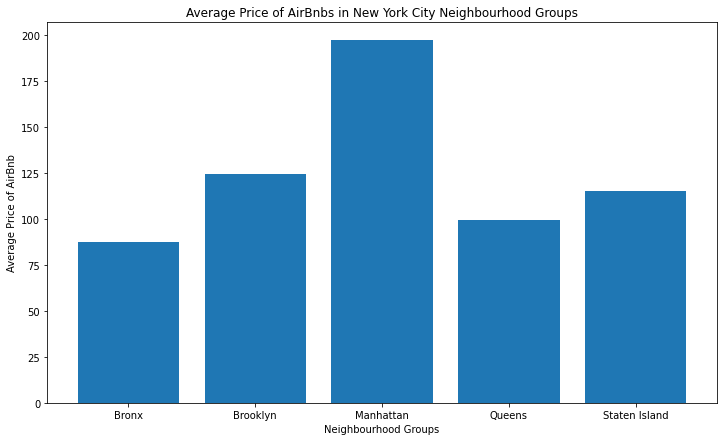

In [131]:
# Grouping by neighbourhood group and finding the mean price of each group
neiGroupMean = df.groupby(['neighbourhood_group'])['price'].mean()
neiGroupNames = list(df.groupby(['neighbourhood_group']).groups.keys())  

# Plotting the data for visualization
plt.bar(neiGroupNames, neiGroupMean, align='center')
plt.xlabel('Neighbourhood Groups')
plt.ylabel('Average Price of AirBnb')
plt.title('Average Price of AirBnbs in New York City Neighbourhood Groups')

From a preliminary visual analysis, it seems like there is a large price variation between Manhattan and all other neighbourhood groups.

### Part 3: Pairwise Pearson correlation analysis on interesting features


I want to analyze the correlation between price, number of reviews, availability, number of listings, and minimum nights. I also want to find the most positively and negatively correlated terms.

In [132]:
# Getting the pairwise Pearson correlation between the variables mentioned above
newDfForCorr = {'price': df['price'], 
                'number_of_reviews': df['number_of_reviews'], 
                'availability_365': df['availability_365'], 
                'calculated_host_listings_count': df['calculated_host_listings_count'], 
                'minimum_nights': df['minimum_nights']}
newDfForCorr = pd.DataFrame(data=newDfForCorr)
correlationAnalysis = newDfForCorr.corr(method='pearson')
newDfForCorr.corr(method='pearson')

,price,number_of_reviews,availability_365,calculated_host_listings_count,minimum_nights
price,1.000000,-0.047954,0.081829,0.057472,0.042799
number_of_reviews,-0.047954,1.000000,0.172028,-0.072376,-0.080116
availability_365,0.081829,0.172028,1.000000,0.225701,0.144303
calculated_host_listings_count,0.057472,-0.072376,0.225701,1.000000,0.127960
minimum_nights,0.042799,-0.080116,0.144303,0.127960,1.000000


After viewing the table, I can easily tell the most positive and negative correlation, so I have shown that below.

In [133]:
# Getting the most positive and most negative correlations
print("Most positive correlation (aside from variables with themselves) is between availability_365 and calculated_host_listings_count.")
print("Most negative correlation is between minimum_nights and number_of_reviews")

Most positive correlation (aside from variables with themselves) is between availability_365 and calculated_host_listings_count.
Most negative correlation is between minimum_nights and number_of_reviews


I will now generate a heat map to further visualize the correlations, and in doing that, I will need to import the Seaborn package.

Text(0.5, 1.0, 'Pairwise Pearson Correlation Analysis on Selected AirBnb Variables')

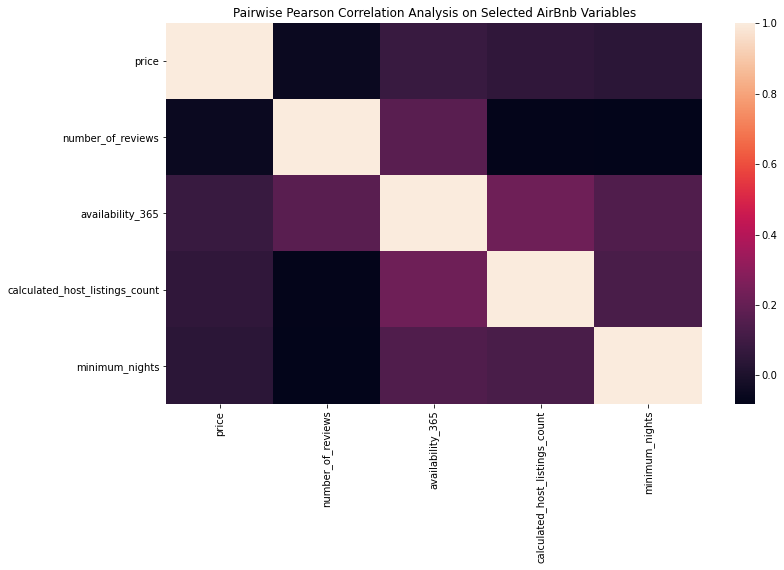

In [134]:
import seaborn as sns

# Generating the heatmap
sns.heatmap(correlationAnalysis)
plt.title('Pairwise Pearson Correlation Analysis on Selected AirBnb Variables')

### Part 4: Working with longitude and latitude

#### Creating a scatter plot based on coordinates of Airbnb locations, and coloring them based on neighbourhood groups

To do this, I will need to restructure the data that I need, so that I can generate a Seaborn scatter plot and label the colors as neighbourhood groups.

Text(0.5, 1.0, 'Color Coded AirBnb Locations in New York City')

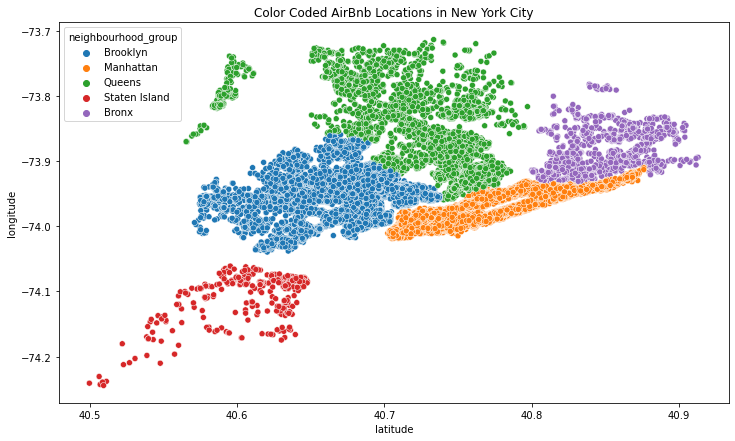

In [135]:
# Restructuring the data, and generating the scatterplot
restructured = {'latitude': df['latitude'], 'longitude': df['longitude']}
restructured = pd.DataFrame(data=restructured)
sns.scatterplot(x='latitude', y='longitude', data=restructured, hue=df['neighbourhood_group'])
plt.title('Color Coded AirBnb Locations in New York City')

#### Creating a scatter plot based on coordinates of Airbnb locations, and coloring them based on prices

To do this, I will need to first find only those listings whose prices are less than 1000, and then plot the scatter plot this time using a different method (using pyplot instead) while coloring the prices of each Airbnb.

Text(0.5, 1.0, 'Price of Airbnb based on location')

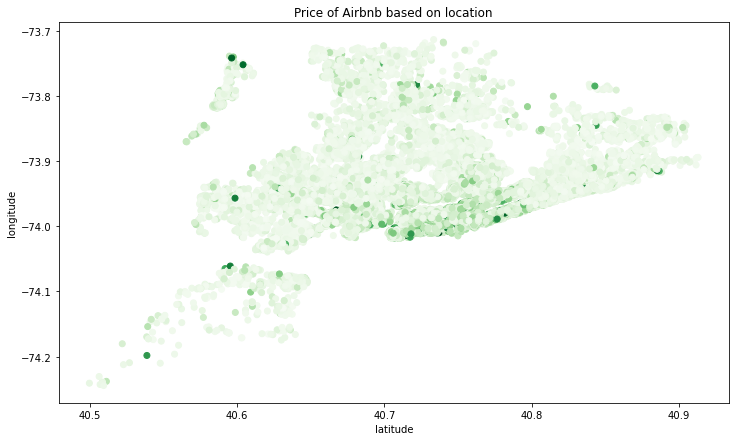

In [136]:
# Getting all Airbnbs with a price under 1000
lonAirbnb = []
latAirbnb = []
priceAirbnb = []
for i in range(len(df['price'])):
    if df['price'][i] < 1000:
        lonAirbnb.append(df['longitude'][i])
        latAirbnb.append(df['latitude'][i])
        priceAirbnb.append(df['price'][i])
        
# Plotting a scatter plot with coordinates and where colors are based on prices of each Airbnb
plt.scatter(latAirbnb, lonAirbnb, c=priceAirbnb, cmap='Greens')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.title('Price of Airbnb based on location')

Visually, by comparing the first and second scatterplots, it seems like Manhattan is the most expensive on average.

### Part 5: Exploring text data

I will generate a word cloud to explore text data within Airbnb names. I'm planning on looking at the most popular words included in Airbnb names, so I will need to tokenize each Airbnb name, and exclude names which include anything except for characters. I will need to import the package wordcloud in order to generate the word cloud.

Text(0.5, 1.0, 'Word Cloud of Most Common Words in Airbnb Names')

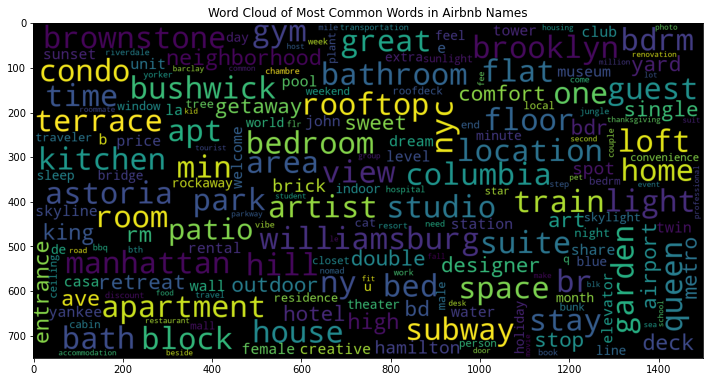

In [137]:
from wordcloud import WordCloud, STOPWORDS

# Tokenizing the names of each Airbnb, and putting them in a dictionary to keep the count of each word
topWords = {}
for i in range(len(df['name'])):
    word = df['name'][i].split()
    for j in range(len(word)):
        tempWord = word[j].lower()
        if tempWord.isalpha() and tempWord in topWords:
            topWords[tempWord] += 1
        elif tempWord.isalpha() and tempWord not in topWords:
            topWords[tempWord] = 1
            
# Getting most frequent words within the dictionary at the top
sorted_topWords = dict(sorted(topWords.items(), key=lambda item: (item[1], item[0]), reverse=True))
topWordsKeys = list(sorted_topWords.keys())
topWordsKeys = ' '.join(topWordsKeys)
stopwords = set(STOPWORDS)

# Plotting the wordcloud with the most common words at the beginning
wordcloud = WordCloud(width=1500, height=750, stopwords=stopwords, min_font_size=14, max_font_size=68).generate(topWordsKeys)
plt.imshow(wordcloud) 
plt.title('Word Cloud of Most Common Words in Airbnb Names')

### Part 6: Exploring and examining Airbnbs with the busiest hosts

I will now look at the neighbourhoods with the busiest hosts, and to do this, I will gather the neighbourhoods and find the means of the number of listings. I want to find the neighbourhood with the highest number of listings, and then attempt to find reasons why.

In [138]:
# Grouping by neighbourhood and getting the mean of the listings per neighbourhood
neighbourhood = df.groupby(['neighbourhood'])['calculated_host_listings_count'].mean()
neighbourhoodList = list(df.groupby(['neighbourhood']).groups.keys())

# Sorting the neighbourhoods, and getting the neighbourhood with the highest number of listings
sorted_nei = dict(sorted(neighbourhood.items(), key=lambda item: (item[1], item[0]), reverse=True))
print(str(list(sorted_nei.keys())[0]) + " has the average busiest hosts")

Financial District has the average busiest hosts


Now that I know that the Financial District has, on average, the busiest hosts, I will attempt to determine the reason why the neighbourhood has the busiest hosts. I will look at the average availabilities, prices, number of reviews, and minimum number of nights required.

[Text(0.5, 0, 'Neighbourhoods (Financial District in RED)'),
 Text(0, 0.5, 'Minimum # of Nights')]

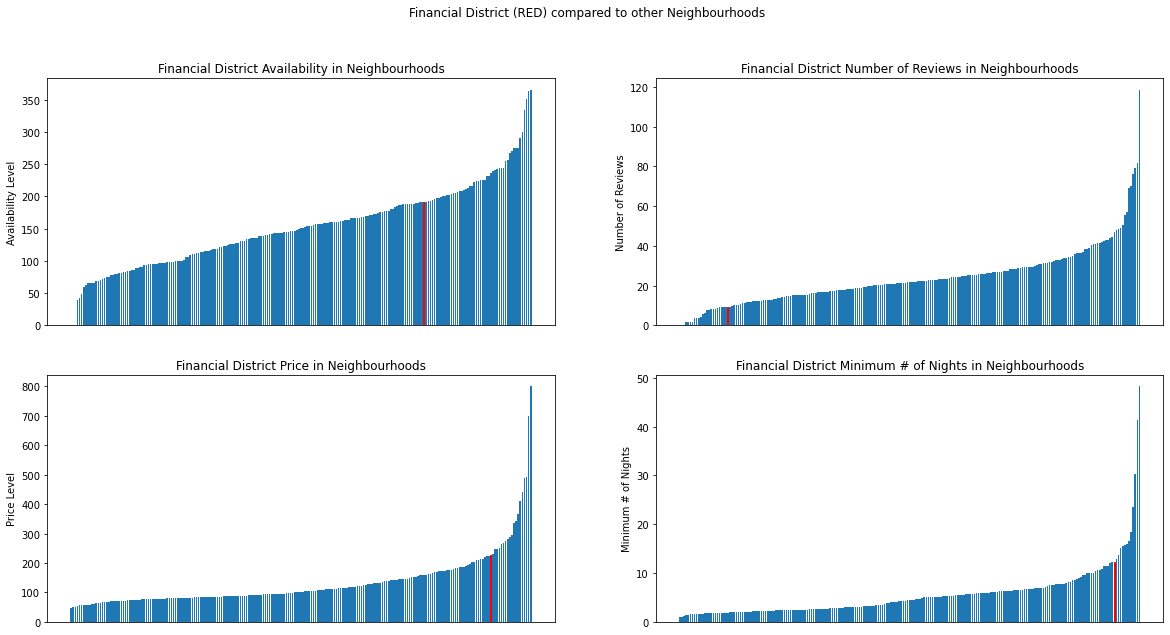

In [139]:
# Getting a collection of 4 subplots for each reason
fig, axis = plt.subplots(2, 2, figsize=(20,10))
fig.suptitle('Financial District (RED) compared to other Neighbourhoods')

# Plotting for Neighbourhood Availabilities
checkAvail = df.groupby(['neighbourhood'])['availability_365'].mean()
checkAvail = dict(sorted(checkAvail.items(), key=lambda item: (item[1], item[0])))
neighList = list(checkAvail.keys())
checkAvail = list(checkAvail.values())
tempIndex = neighList.index('Financial District')
plt.xticks(rotation='vertical')
availPlot = axis[0, 0].bar(neighList, checkAvail)
availPlot[tempIndex].set_color('r')
axis[0, 0].set_title('Financial District Availability in Neighbourhoods')
axis[0, 0].axes.get_xaxis().set_visible(False)
axis[0, 0].set(xlabel='Neighbourhoods (Financial District in RED)', ylabel='Availability Level')

# Plotting for Neighbourhood Prices
checkAvail = df.groupby(['neighbourhood'])['price'].mean()
checkAvail = dict(sorted(checkAvail.items(), key=lambda item: (item[1], item[0])))
neighList = list(checkAvail.keys())
checkAvail = list(checkAvail.values())
tempIndex = neighList.index('Financial District')
plt.xticks(rotation='vertical')
availPlot = axis[1, 0].bar(neighList, checkAvail)
availPlot[tempIndex].set_color('r')
axis[1, 0].set_title('Financial District Price in Neighbourhoods')
axis[1, 0].axes.get_xaxis().set_visible(False)
axis[1, 0].set(xlabel='Neighbourhoods (Financial District in RED)', ylabel='Price Level')

# Plotting for Neighbourhood Number of Reviews
checkAvail = df.groupby(['neighbourhood'])['number_of_reviews'].mean()
checkAvail = dict(sorted(checkAvail.items(), key=lambda item: (item[1], item[0])))
neighList = list(checkAvail.keys())
checkAvail = list(checkAvail.values())
tempIndex = neighList.index('Financial District')
plt.xticks(rotation='vertical')
availPlot = axis[0, 1].bar(neighList, checkAvail)
availPlot[tempIndex].set_color('r')
axis[0, 1].set_title('Financial District Number of Reviews in Neighbourhoods')
axis[0, 1].axes.get_xaxis().set_visible(False)
axis[0, 1].set(xlabel='Neighbourhoods (Financial District in RED)', ylabel='Number of Reviews')

# Plotting for Neighbourhood Minimum Number of Nights
checkAvail = df.groupby(['neighbourhood'])['minimum_nights'].mean()
checkAvail = dict(sorted(checkAvail.items(), key=lambda item: (item[1], item[0])))
neighList = list(checkAvail.keys())
checkAvail = list(checkAvail.values())
tempIndex = neighList.index('Financial District')
plt.xticks(rotation='vertical')
availPlot = axis[1, 1].bar(neighList, checkAvail)
availPlot[tempIndex].set_color('r')
axis[1, 1].set_title('Financial District Minimum # of Nights in Neighbourhoods')
axis[1, 1].axes.get_xaxis().set_visible(False)
axis[1, 1].set(xlabel='Neighbourhoods (Financial District in RED)', ylabel='Minimum # of Nights')

As shown from above, the Financial District neighbourhood has somewhat higher availability, a very low number of reviews, a high price, and a high minimum number of nights. Extrapolating that information, it seems that the Financial District on average offers Airbnbs with a somewhat lavish and expensive experience, for people who are intending to stay for relatively longer periods of time. 

It seems that there is a relatively higher demand for Airbnbs with these specifications, which would explain why the Financial District has the highest amount of listings.


### Part 7: Miscellaneous Data Analysis

Lastly, I will be looking at the correlation between the number of reviews and the number of reviews per month, as well as looking into the percentages of how many Airbnbs are entire homes, private rooms, or shared rooms.

Text(0.5, 1.0, 'Number of Reviews vs Reviews per Month')

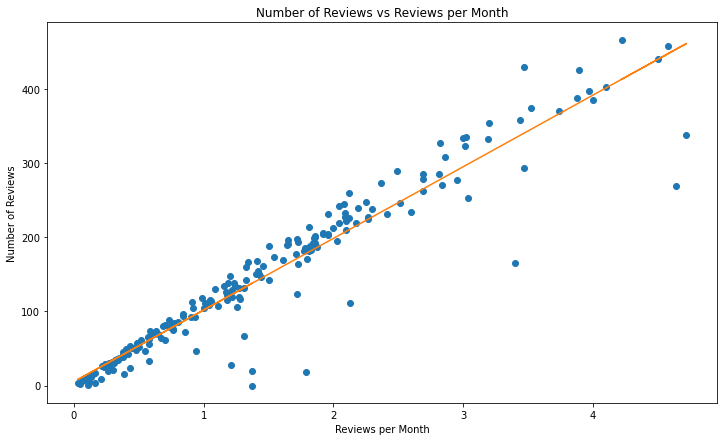

In [140]:
# Getting the number of reviews and the reviews per month, 
# and then plotting them with linear regression to find a trend
compareReviewsAndReviews = {}
for i in df['number_of_reviews']:
    compareReviewsAndReviews[df['number_of_reviews'][i]] = df['reviews_per_month'][i]
compareReviewsAndReviews = dict(sorted(compareReviewsAndReviews.items(), key=lambda item: (item[0], item[1])))
y = np.array(list(compareReviewsAndReviews.keys()))
x = np.array(list(compareReviewsAndReviews.values()))
plt.plot(x, y, 'o')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)
plt.xlabel("Reviews per Month")
plt.ylabel("Number of Reviews")
plt.title("Number of Reviews vs Reviews per Month")

It seems that there is a clear correlation between the number of reviews and the reviews per month; as the number of reviews per month goes up, the overall number of reviews increases. This evidently makes sense as the reviews per month contributes to the overall number of reviews.

Now I will look at the percentages of Airbnbs which are entire homes, private rooms, or shared rooms.

Text(0.5, 1.0, 'Airbnb Room Types in New York City')

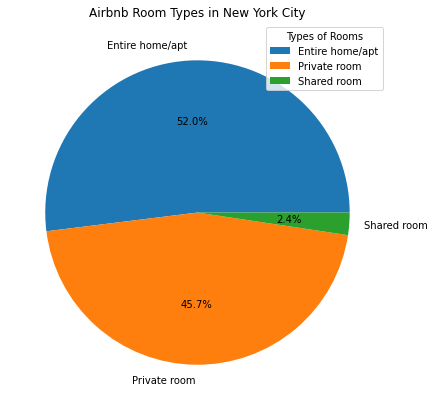

In [141]:
# Plotting a pie chart looking into the room types
roomTypesList = df.groupby(['room_type']).size()
plt.pie(roomTypesList, labels = list(roomTypesList.keys()), autopct='%1.1f%%')
plt.legend(title= "Types of Rooms")
plt.title("Airbnb Room Types in New York City")

Some interesting information is revealed about room types for Airbnbs, where over 50% of the rooms are entire homes or apartments, and over 45% are private rooms. There is only a very small percentage of rooms which are shared, at a mere 2.4%. 

### Final thoughts

Given this introductory data analysis of New York City Airbnb data, I was able to uncover quite a bit of data and knowledge regarding Airbnbs in New York City. This information seems to be useful as an introduction, but further analysis may be required on certain variables in order to extrapolate further data.

Created By: 
Horace Liu